# EDA with Python on Titanic Dataset 

In this project we are going to work on exploratory data analysis of Titanic Dataset from Kaggle.

### Let's import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Train Data

In [64]:
df_train = pd.read_csv('DataSets/train.csv')
df_test = pd.read_csv('DataSets/test.csv')
df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
print('Test')
print(df_test.isnull().sum())
print('--------')
print()
print(df_train.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Explanations about data from Kaggle


<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values

In [6]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Roughly 20 percent of the Age data and 77 percent of the Cabin data are missing. 

Only 2 people aboard has no information about where he/she got on the ship.

These two rows can be dropped.

The heatmap below shows the distribution of the missing data within all data.

<AxesSubplot:>

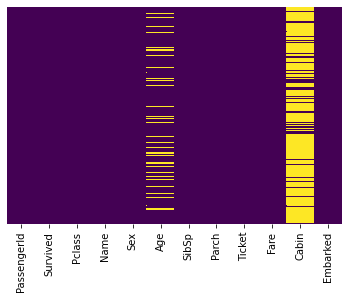

In [7]:
sns.heatmap(df_train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Lets examine the Age column and decide how we will handle with missing values.

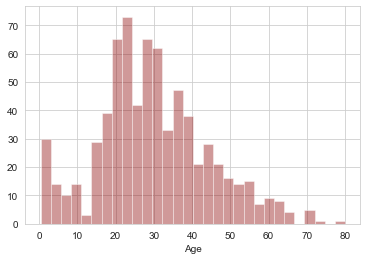

In [8]:
sns.set_style('whitegrid')
sns.distplot(df_train['Age'].dropna(),kde=False,color = 'darkred',bins=30);

<AxesSubplot:>

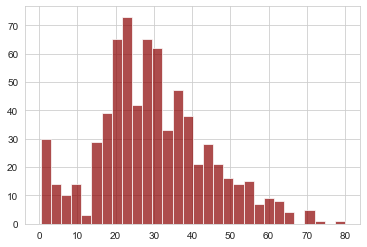

In [9]:
df_train['Age'].hist(bins=30,color='darkred',alpha=0.7)

In [10]:
print('Age mean:{}, Age median:{}'.format(df_train.Age.mean(), df_train.Age.median()))


Age mean:29.69911764705882, Age median:28.0


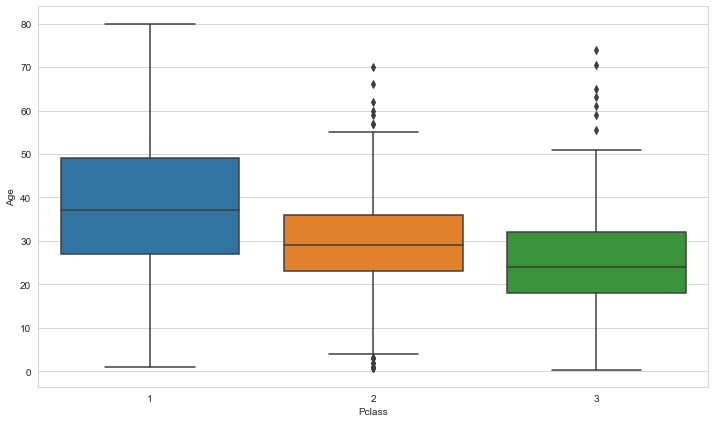

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df_train);

From these boxplots can be interpreted that the older people preferd to be in first class, and as the class quality decreses the median age decreases. Lets find these median values.

In [12]:
##finding the ages median values by the passenger class 

median_class= {} 

for i in df_train.Pclass.unique():
    median_class['Class {}'.format(i)] = df_train[df_train.Pclass == i]['Age'].median()
    
for i in median_class:
    print(i,':', median_class[i])

Class 3 : 24.0
Class 1 : 37.0
Class 2 : 29.0


In [13]:
df_train['Age']=df_train['Age'].fillna(df_train.groupby('Pclass')['Age'].transform('median'))

<AxesSubplot:>

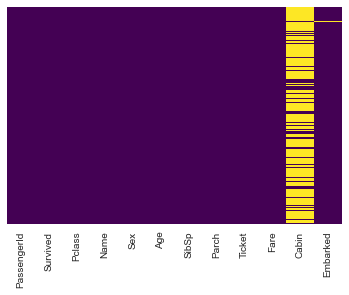

In [14]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

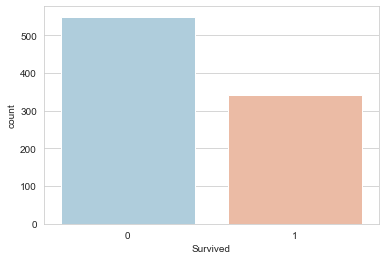

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

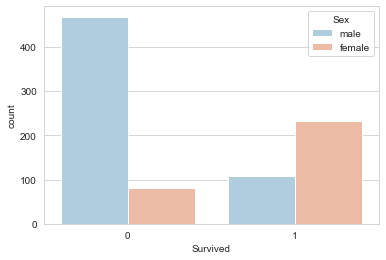

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

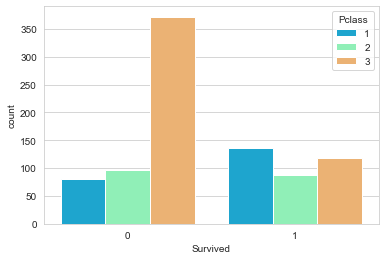

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

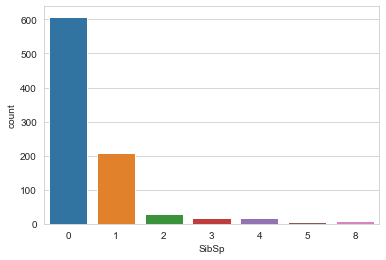

In [18]:
sns.countplot(x='SibSp',data=df_train)

<AxesSubplot:>

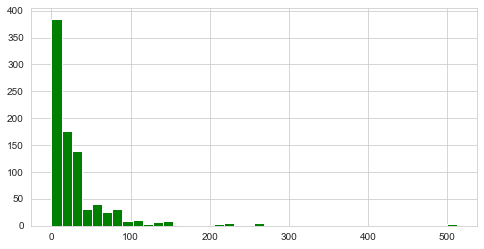

In [19]:
df_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#### Dropping cabin column

In [20]:
df_train.drop('Cabin', axis = 1, inplace= True)
df_train.dropna(inplace = True)

### Some feature engineering

In [21]:
df_train["Ticket"].value_counts(dropna = False).head(20)

347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
19950           4
17421           4
W./C. 6608      4
PC 17757        4
349909          4
347077          4
2666            4
113760          4
4133            4
113781          4
PC 17760        3
Name: Ticket, dtype: int64

In [22]:
group_ticket_list = list(df_train.Ticket.value_counts()[df_train.Ticket.value_counts() > 1].index)
group_ticket_list
df_train["is_group"] = df_train['Ticket'].isin(group_ticket_list) * 1

<AxesSubplot:xlabel='Survived', ylabel='count'>

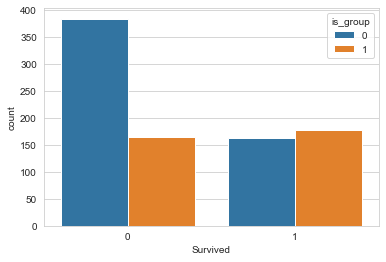

In [23]:
sns.countplot(x="Survived", data=df_train, hue="is_group")

In [24]:
df_train["is_alone"] = ((df_train["SibSp"] != 0) | (df_train["Parch"] != 0)) * 1

<AxesSubplot:xlabel='Survived', ylabel='count'>

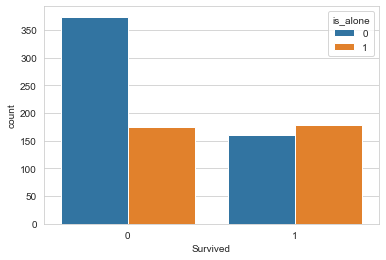

In [25]:
sns.countplot(x="Survived", data=df_train, hue="is_alone")

In [26]:
df_train["Female"]=( df_train['Sex'] == 'female') * 1

<AxesSubplot:>

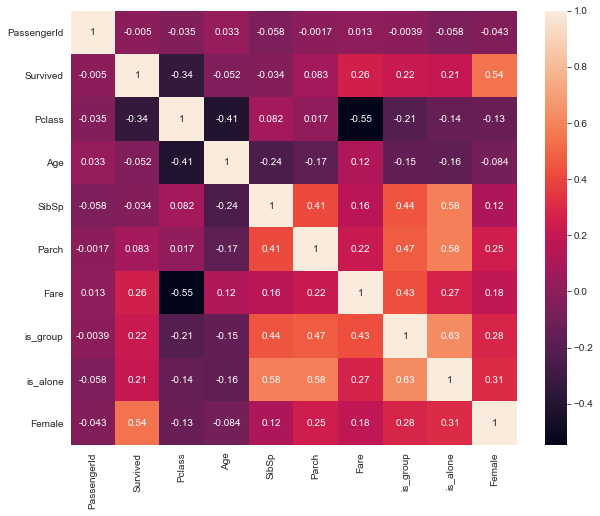

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot=True)

In [28]:
df_train = pd.get_dummies(data = df_train,columns=["Embarked"], drop_first=True)


<AxesSubplot:>

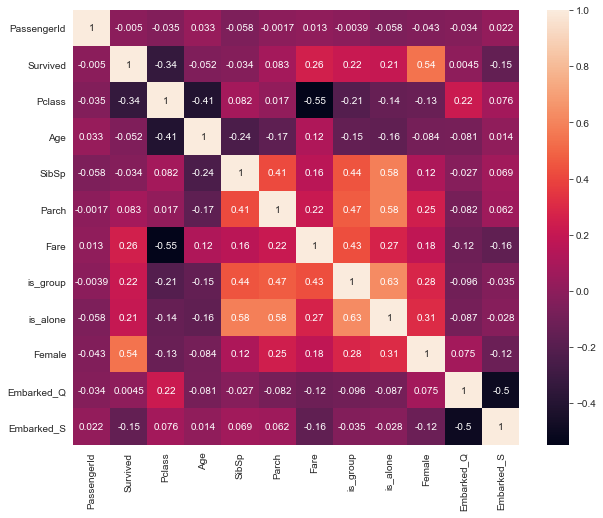

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot=True)

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,is_group,is_alone,Female,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,0,0,1


let's drop the columns PassengerID, Name ,Sex, Ticket

In [31]:
df_train_ready = df_train.drop(['PassengerId', 'Name' ,'Sex', 'Ticket'], axis=1)

<AxesSubplot:>

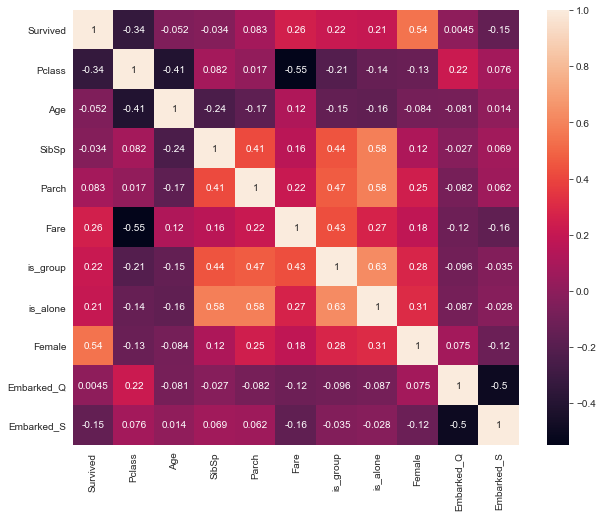

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train_ready.corr(), annot = True)

In [33]:
df_train_ready.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_group,is_alone,Female,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,0.219798,0.206207,0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,-0.209418,-0.138553,-0.127741,0.220558,0.076466
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,-0.151105,-0.163199,-0.083730,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,0.443777,0.584186,0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,0.473703,0.583112,0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,0.431175,0.274079,0.179958,-0.116684,-0.163758
is_group,0.219798,-0.209418,-0.151105,0.443777,0.473703,0.431175,1.000000,0.627286,0.280838,-0.095533,-0.034918
is_alone,0.206207,-0.138553,-0.163199,0.584186,0.583112,0.274079,0.627286,1.000000,0.306985,-0.087099,-0.027982
Female,0.541585,-0.127741,-0.083730,0.116348,0.247508,0.179958,0.280838,0.306985,1.000000,0.075217,-0.121405
Embarked_Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.095533,-0.087099,0.075217,1.000000,-0.499261


In [34]:
df_train_ready = pd.get_dummies(data = df_train_ready,columns=["Pclass"], drop_first=True)

df_train_ready

,Survived,Age,SibSp,Parch,Fare,is_group,is_alone,Female,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,1,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,0,0,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,1,0,0
888,0,24.0,1,2,23.4500,1,1,1,0,1,0,1
889,1,26.0,0,0,30.0000,0,0,0,0,0,0,0


In [35]:
# df_train_ready.drop('SibSp', axis = 1, inplace = True)

## Model

In [36]:
X = df_train_ready.drop("Survived", axis=1)
y = df_train_ready["Survived"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

##### Training 

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
model.score(X_test,y_test)

0.8430493273542601

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_test,y_test,cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.8207509881422924


In [43]:
scores

array([0.82608696, 0.7826087 , 0.82608696, 0.72727273, 0.77272727,
       0.86363636, 0.81818182, 0.90909091, 0.77272727, 0.90909091])

#### Evaluation

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       136
           1       0.84      0.74      0.79        87

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



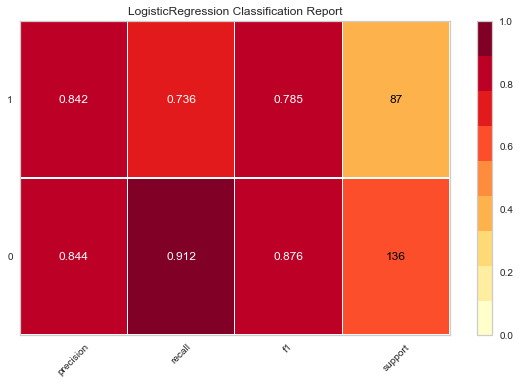

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [54]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

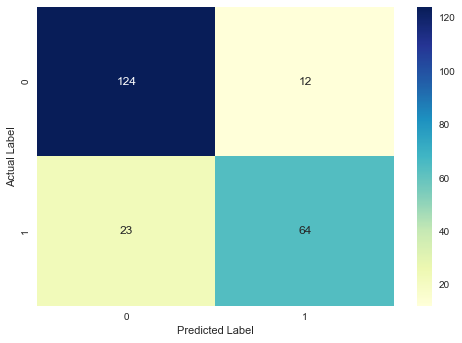

In [55]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## XGBoost

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[12:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[120  16]
 [ 21  66]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       136
           1       0.80      0.76      0.78        87

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



## RandomForest 

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_model = RandomForestClassifier().fit(X_train,y_train)
rf_model

RandomForestClassifier()

In [62]:
y_pred_rf = rf_model.predict(X_test)

[[122  14]
 [ 20  67]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       136
           1       0.83      0.77      0.80        87

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223



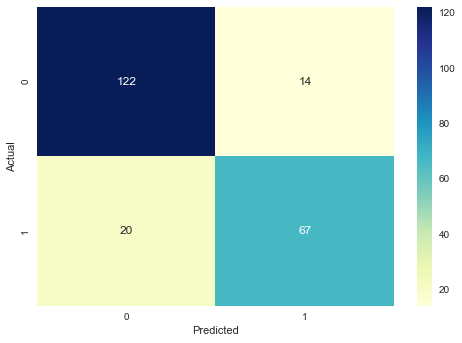

In [63]:
cnf_matrix = confusion_matrix(y_test,y_pred_rf)

print(cnf_matrix)
print('\n')
print(classification_report(y_test,y_pred_rf))

sns.heatmap(cnf_matrix, annot = True,cmap = 'YlGnBu',fmt='d')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
